## Customer Engagement Analytics: Channel & Time-Based Conversion Insights

## This is the real time project of the website data analysis.

## We are  performing Exploratory Data Analysis (EDA)

## Import Libraries  

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data for analysis

In [33]:
df = pd.read_csv("data-export (1).csv")

In [34]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


## Fix Header means remove the un-uses header.

In [35]:

# Pehli row ko column headers bana diya 
df.columns = df.iloc[0]

#Pehli row ko remove kar diya jo ab header ban chuki hai.
df.columns = df.iloc[0]

#Purana index hata ke naya index assign kiya clean numbering ke liye.
df = df.drop(index=0).reset_index(drop=True)


In [36]:
df.head(2)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147


## Step 1: Rename Long Column Names

In [37]:
df.rename(columns={
    "Session primary channel group (Default channel group)": "Channel",
    "Date + hour (YYYYMMDDHH)": "DateHour",
    "Average engagement time per session": "AvgTime",
    "Engaged sessions per user": "EngSess/User",
    "Events per session": "Events/Session",
    "Engagement rate": "Rate",
    "Event count": "Events"
}, inplace=True)


In [38]:
df.head(3)

,Channel,DateHour,Users,Sessions,Engaged sessions,AvgTime,EngSess/User,Events/Session,Rate,Events
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069


## Check Data Information.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           3182 non-null   object
 1   DateHour          3182 non-null   object
 2   Users             3182 non-null   object
 3   Sessions          3182 non-null   object
 4   Engaged sessions  3182 non-null   object
 5   AvgTime           3182 non-null   object
 6   EngSess/User      3182 non-null   object
 7   Events/Session    3182 non-null   object
 8   Rate              3182 non-null   object
 9   Events            3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


## Step 2: Convert Columns to Numeric

In [40]:
# Important numeric columns ka list banaya.
num_cols = ["Users", "Sessions", "Engaged sessions", "AvgTime", 
            "EngSess/User", "Events/Session", "Rate", "Events"]

# Sabhi ko number (float/int) me convert karta hai (pd.to_numeric).
# Agar koi column me text ya garbage data hua, to  errors='coerce' use NaN bana dega (safe handling)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           3182 non-null   object 
 1   DateHour          3182 non-null   object 
 2   Users             3182 non-null   int64  
 3   Sessions          3182 non-null   int64  
 4   Engaged sessions  3182 non-null   int64  
 5   AvgTime           3182 non-null   float64
 6   EngSess/User      3182 non-null   float64
 7   Events/Session    3182 non-null   float64
 8   Rate              3182 non-null   float64
 9   Events            3182 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 248.7+ KB


## Check Satatics value.

In [42]:
df.describe()

,Users,Sessions,Engaged sessions,AvgTime,EngSess/User,Events/Session,Rate,Events
count,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470
std,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000
50%,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000
75%,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000
max,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000


## Check NUll value 

In [43]:
df.isnull().sum()

0
Channel             0
DateHour            0
Users               0
Sessions            0
Engaged sessions    0
AvgTime             0
EngSess/User        0
Events/Session      0
Rate                0
Events              0
dtype: int64

## Split the column datehour = date + hour.

## Creat New column for hour.

In [46]:
df['DateHour']=pd.to_datetime(df['DateHour'],format='%Y%m%d%H',errors='coerce')
df['Hour']=df['DateHour'].dt.hour


In [47]:
df.head()

,Channel,DateHour,Users,Sessions,Engaged sessions,AvgTime,EngSess/User,Events/Session,Rate,Events,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


## 1. Which marketing channels drive the most engaged users?
### Har company yeh jaanna chahti hai ki kis channel se aaye users sabse zyada engage hote hain, taaki wahin pe budget aur focus kare.

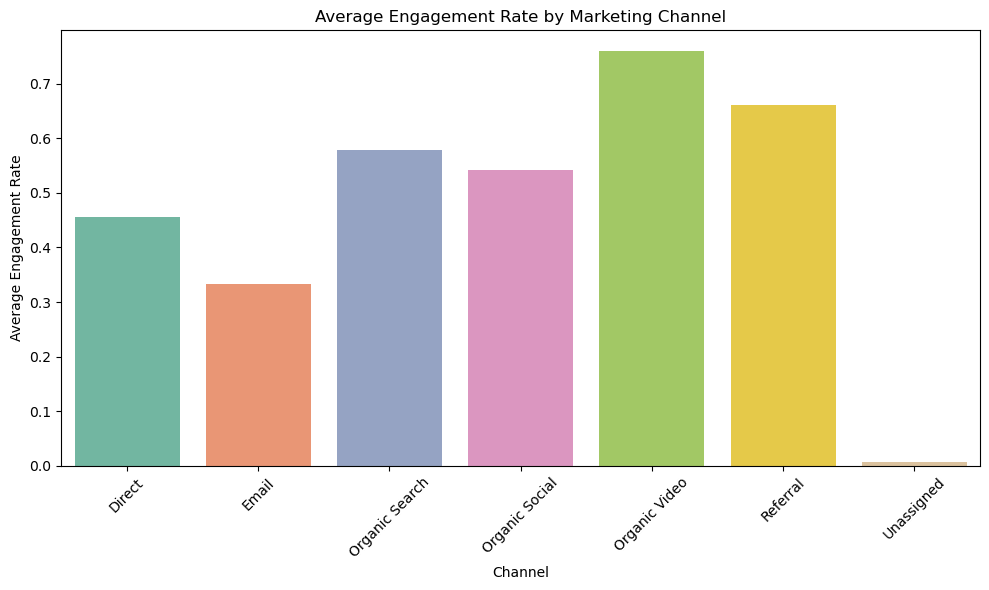

In [49]:
# Group by Channel and get average engagement rate
engagement_by_channel = df.groupby('Channel')['Rate'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=engagement_by_channel, x='Channel', y='Rate',hue='Channel', palette='Set2')
plt.title('Average Engagement Rate by Marketing Channel')
plt.xlabel('Channel')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. What are the peak hours of user activity?
### Har product team chahti hai ki unhe pata ho kab users sabse active hote hain — taaki wahi time target karein notifications, sales, ya ads ke liye.

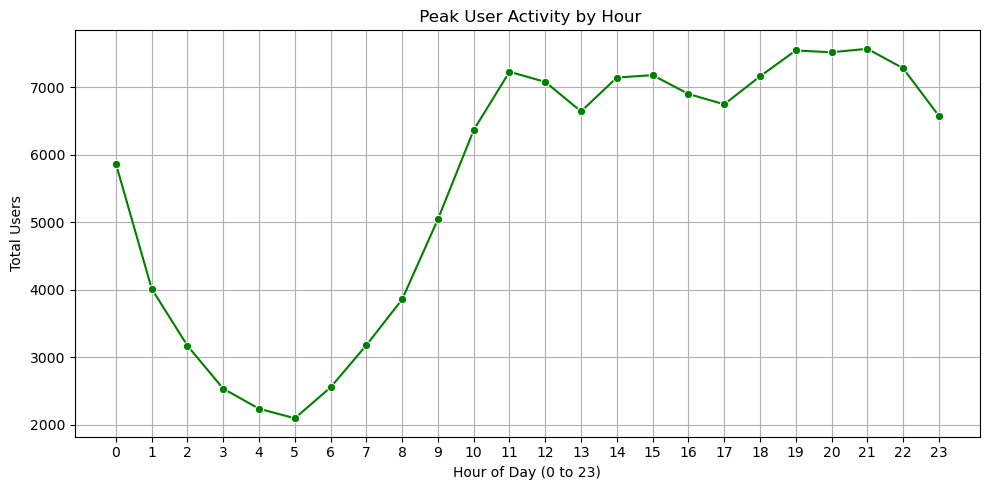

In [50]:

# Group by Hour
hourly_users = df.groupby('Hour')['Users'].sum().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_users, x='Hour', y='Users', marker='o', color='green')
plt.title(' Peak User Activity by Hour')
plt.xlabel('Hour of Day (0 to 23)')
plt.ylabel('Total Users')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.Which channels bring high traffic but low engagement?
### Aim hai aise channels identify karna jahan se sessions toh zyada aa rahe hain, lekin users engage nahi ho rahe (low Rate).

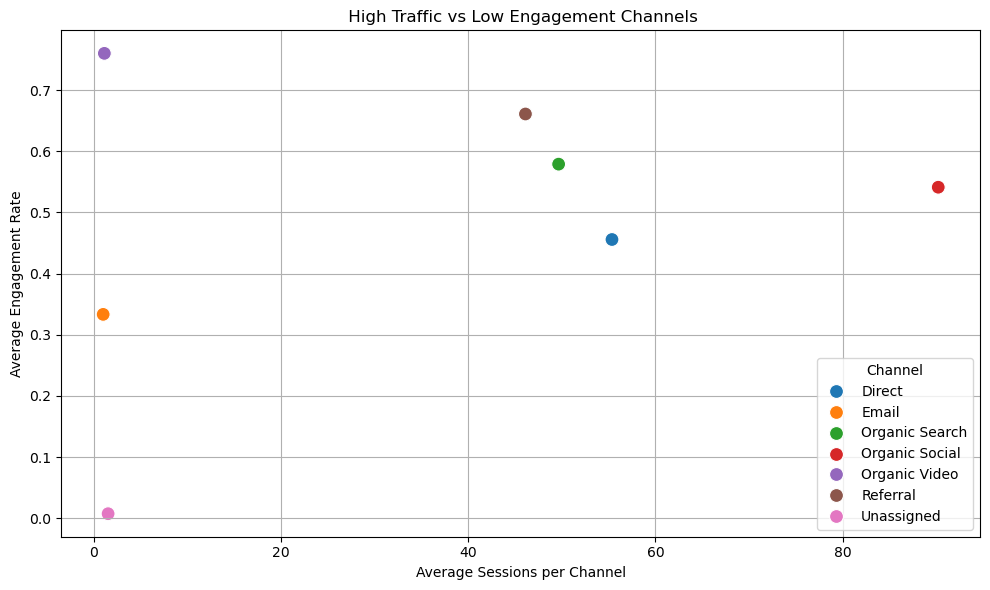

In [64]:
# Group data by channel
channel_data = df.groupby('Channel')[['Sessions', 'Rate']].mean().reset_index()

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=channel_data, x='Sessions', y='Rate', hue='Channel', s=100)
plt.title(' High Traffic vs Low Engagement Channels')
plt.xlabel('Average Sessions per Channel')
plt.ylabel('Average Engagement Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Which metrics most influence conversions (Events)?

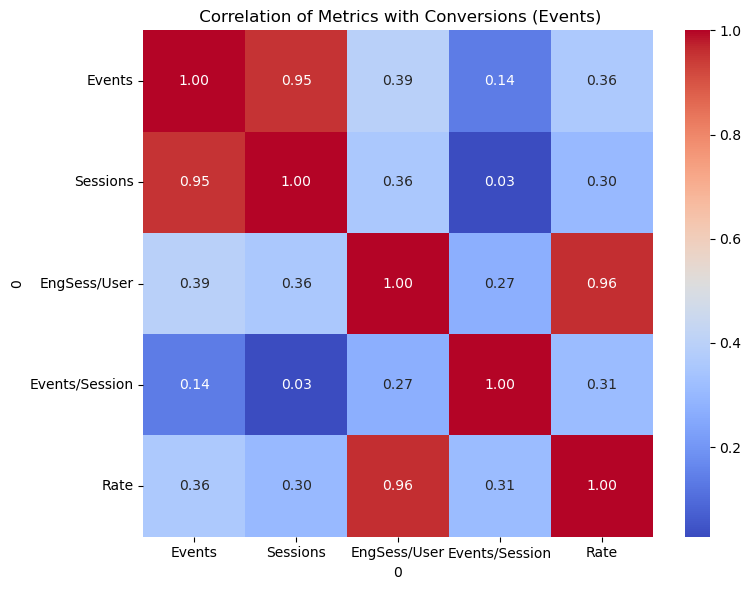

In [54]:
# Step 1: Define the relevant numeric columns
cols = ['Events', 'Sessions', 'EngSess/User',
        'Events/Session', 'Rate']

# Calculate correlation
corr = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(' Correlation of Metrics with Conversions (Events)')
plt.tight_layout()
plt.show()

## 5. What are the peak hours for conversions (Events)?

### Iska purpose hai yeh samajhna ki kaunse ghante me sabse zyada conversions (events) ho rahe hain.

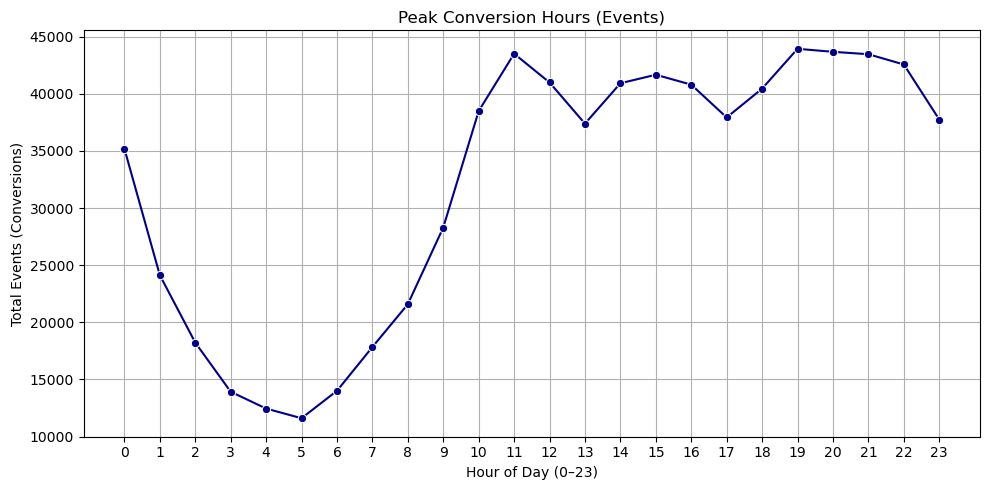

In [56]:
# Group total events by hour
events_by_hour = df.groupby('Hour')['Events'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10,5))
sns.lineplot(data=events_by_hour, x='Hour', y='Events', marker='o', color='darkblue')
plt.title('Peak Conversion Hours (Events)')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Total Events (Conversions)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Which channels have the highest Events per Session?
### Yeh metric batata hai ki har session me kitne meaningful events (actions) ho rahe hain.

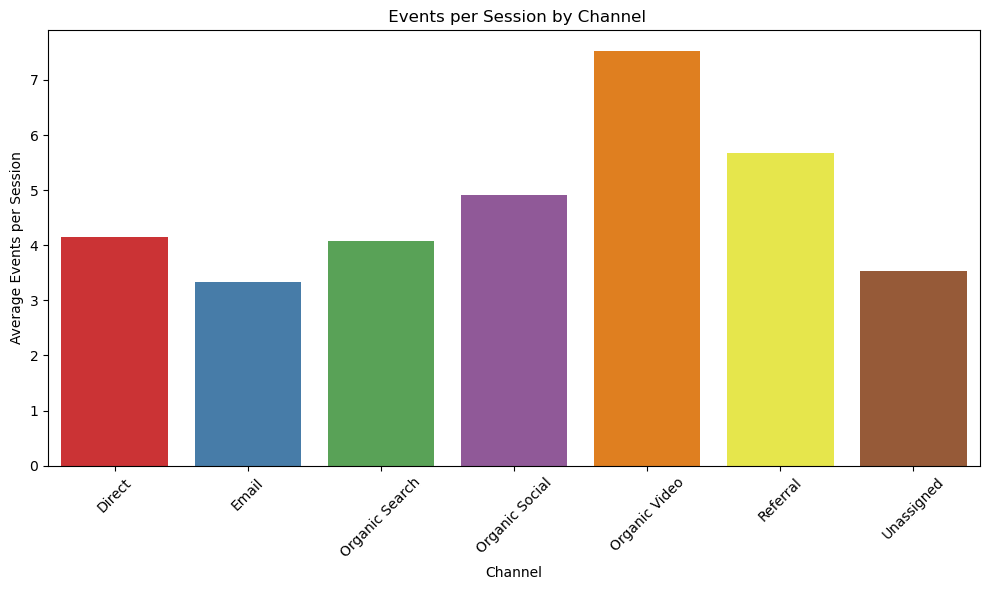

In [58]:
# Group by channel and find average
eps_by_channel = df.groupby('Channel')['Events/Session'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=eps_by_channel, x='Channel', y='Events/Session', hue='Channel', palette='Set1', legend=False)
plt.title(' Events per Session by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Events per Session')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Which channels have high users but low conversions?
### Business yeh jaana chahta hai ki kaunsa channel sirf traffic la raha hai lekin users convert nahi ho rahe — matlab opportunity waste ho rahi hai.

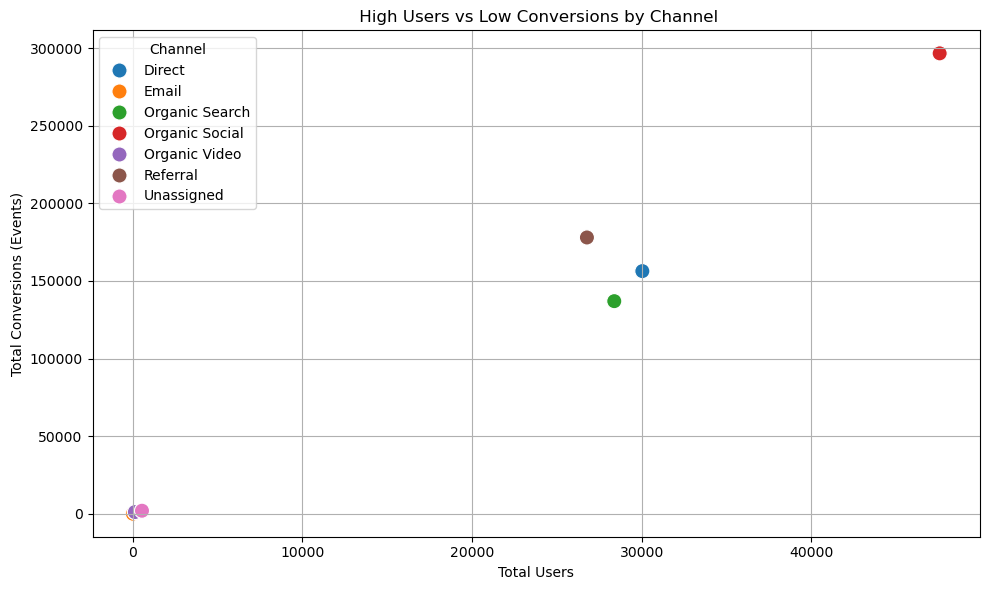

In [59]:
# Group by Channel
user_event = df.groupby('Channel')[['Users', 'Events']].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=user_event, x='Users', y='Events', hue='Channel', s=120)
plt.title(' High Users vs Low Conversions by Channel')
plt.xlabel('Total Users')
plt.ylabel('Total Conversions (Events)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 8. Which hour of the day has the highest engagement rate?
### Company yeh dekhna chahti hai ki kab users sabse zyada actively engage karte hain (scroll, click, interact, etc.). Yeh insight campaigns aur push notifications ke timing ke liye important hai.

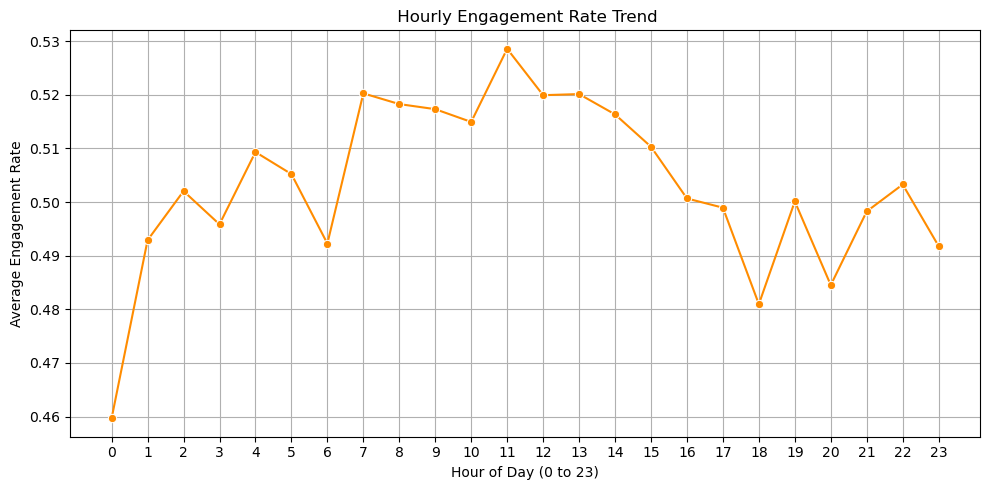

In [60]:
# Group by hour and take average engagement rate
hourly_rate = df.groupby('Hour')['Rate'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_rate, x='Hour', y='Rate', marker='o', color='darkorange')
plt.title(' Hourly Engagement Rate Trend')
plt.xlabel('Hour of Day (0 to 23)')
plt.ylabel('Average Engagement Rate')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

## 10.Which channels show signs of bounce (low Engaged Sessions per User)?
### Agar kisi channel ka EngSess/User ratio bahut low hai, toh wo channel bounce hone wale ya low-quality traffic ka signal ho sakta hai. 

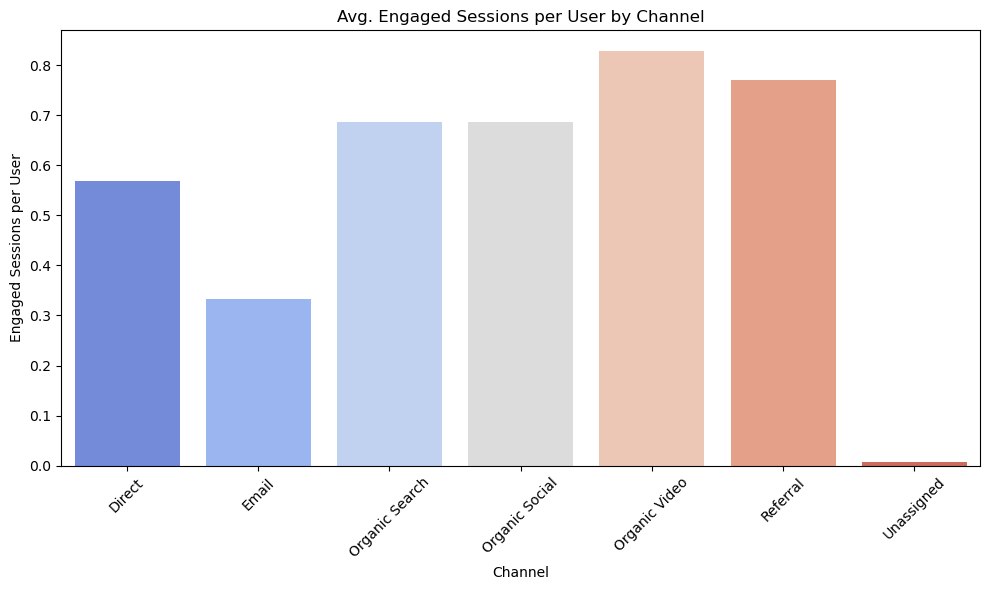

In [62]:

# Group by Channel and calculate average
bounce_check = df.groupby('Channel')['EngSess/User'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=bounce_check, x='Channel', y='EngSess/User', hue='Channel', palette='coolwarm', legend=False)
plt.title('Avg. Engaged Sessions per User by Channel')
plt.xlabel('Channel')
plt.ylabel('Engaged Sessions per User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10.Which channels bring the most total conversions (Events)?
### Har company yeh jaana chahti hai ki kaunsa traffic source sabse zyada conversions laa raha hai

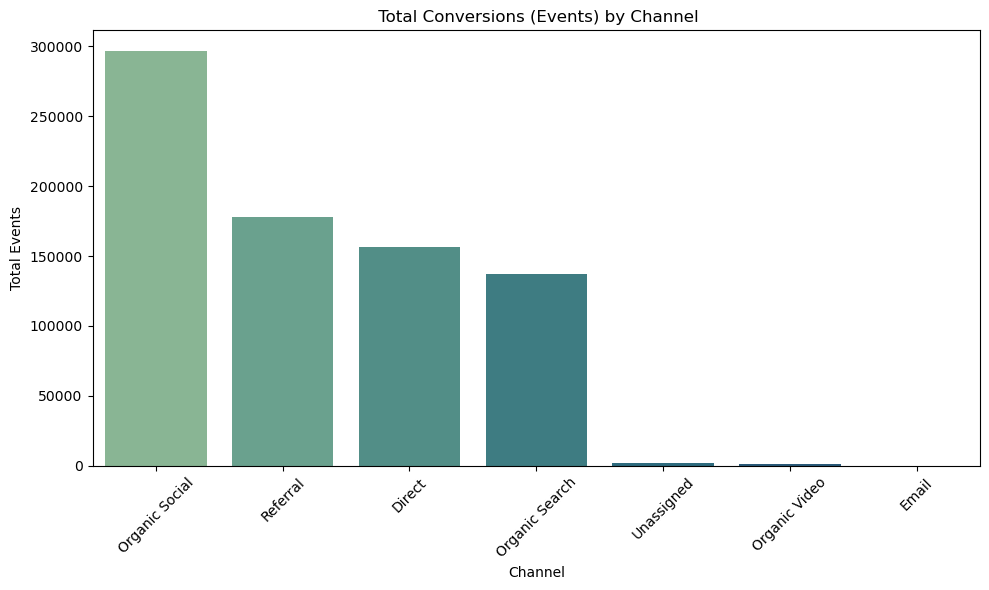

In [63]:
# Group by Channel and sum total Events
total_events = df.groupby('Channel')['Events'].sum().reset_index().sort_values(by='Events', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=total_events, x='Channel', y='Events', hue='Channel', palette='crest', legend=False)
plt.title(' Total Conversions (Events) by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 11.Traffic By Hour and Channels.

In [67]:
df.head(2)

,Channel,DateHour,Users,Sessions,Engaged sessions,AvgTime,EngSess/User,Events/Session,Rate,Events,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19


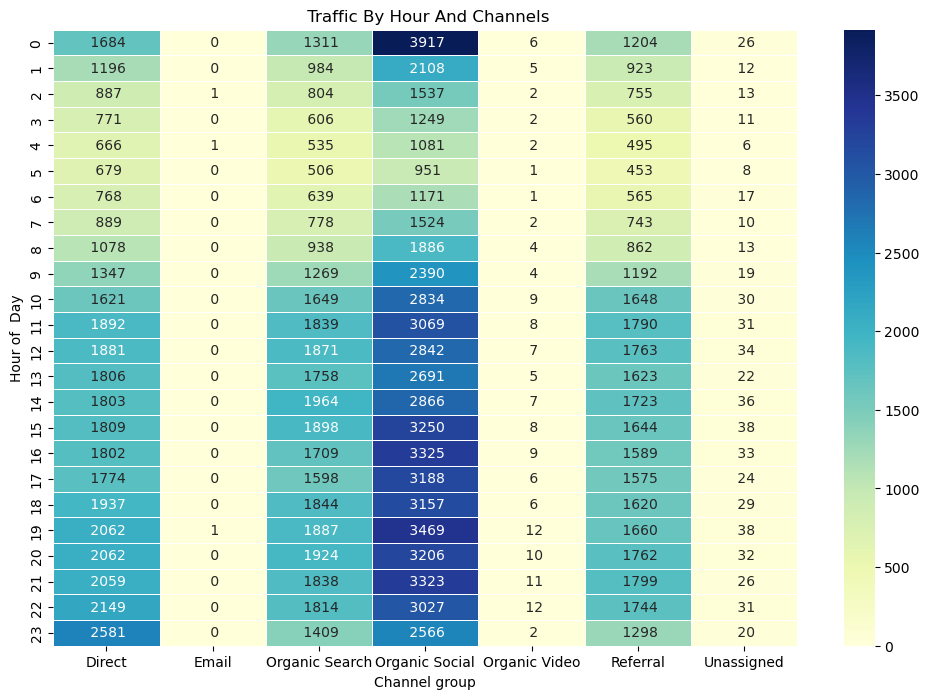

In [68]:
heatmap_data=df.groupby(["Hour","Channel"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='YlGnBu',linewidth =.5,
            annot=True,fmt=" .0f")
plt.title(" Traffic By Hour And Channels")
plt.xlabel("Channel group")
plt.ylabel("Hour of  Day")
plt.show()